In [1]:
import numpy as np
import math
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import glob
import gc
from utils import *

In [2]:
class Config():
    def __init__(self):
        self.obj_num = 2 # the number of person
        self.frame_l = 64 # the length of frames
        self.joint_n = 25 # the number of joints
        self.joint_d = 3 # the dimension of classes
        self.clc_num = 60 # the number of classes
        self.key_ind = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

C = Config()

In [3]:
data_path = '/mnt/nasbi/homes/fan/projects/action/skeleton/data/NTU/'
xlist = ['xview_train.pkl','xview_val.pkl','xsub_train.pkl','xsub_val.pkl']

In [4]:
xview_val = pd.read_pickle(data_path+xlist[1],compression='gzip')
xview_train = pd.read_pickle(data_path+xlist[0],compression='gzip')

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
def show3Dpose(vals0,vals1): # blue, orange
    """
    Visualize a 3d skeleton
    Args
    vals: 25x3 vector. The pose to plot.
    ax: matplotlib 3d axis to draw on
    lcolor: color for left part of the body
    rcolor: color for right part of the body
    add_labels: whether to add coordinate labels
    Returns
    Nothing. Draws on ax.
    """
    plt.figure(figsize=(20,20))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    f_ind = np.array([
                [0,1], 
                [1,20],
                [20,2],
                [2,3],
                [20,4],
                [4,5],
                [5,6],
                [6,7],
                [20,8],
                [8,9],
                [9,10],
                [10,11],
                [0,16],
                [16,17],
                [17,18],
                [18,19],
                [0,12],
                [12,13],
                [13,14],
                [14,15]])

    I   = f_ind[:,0] # start points
    J   = f_ind[:,1] # end points

    # Make connection matrix
    for i in np.arange( len(I) ):
        x, y, z = [np.array( [vals0[I[i], j], vals0[J[i], j]] ) for j in range(3)]
        ax.plot(x, z, y, lw=2, c='m')
        #ax.scatter(x, z, y, c='black',marker='o')
        x, y, z = [np.array( [vals1[I[i], j], vals1[J[i], j]] ) for j in range(3)]
        ax.plot(x, z, y, lw=2, c='c')
        #ax.scatter(x, z, y, c='black',marker='o')   
        
    RADIUS = 1 # space around the subject
    
    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    ax.set_zlim3d([-RADIUS, RADIUS])


    #ax.set_xlabel("x")
    #ax.set_ylabel("y")
    #ax.set_zlabel("z")
    
    # Get rid of the ticks and tick labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
    ax.set_zticklabels([])
    ax.set_aspect('equal')

    # Get rid of the panes (actually, make them white)
    white = (1.0, 1.0, 1.0, 0.0)
    ax.w_xaxis.set_pane_color(white)
    ax.w_yaxis.set_pane_color(white)
    ax.w_zaxis.set_pane_color(white)
    # Keep z pane

    # Get rid of the lines in 3d
    ax.w_xaxis.line.set_color(white)
    ax.w_yaxis.line.set_color(white)
    ax.w_zaxis.line.set_color(white)
    
    plt.show()

In [7]:
from scipy.spatial.distance import euclidean

def normlize_range_two(p_0,p_1):  
 
    m_0 = (np.mean(p_0[0,:,0])+np.mean(p_1[0,:,0]))/2
    m_1 = (np.mean(p_0[0,:,1])+np.mean(p_1[0,:,1]))/2
    m_2 = (np.mean(p_0[0,:,2])+np.mean(p_1[0,:,2]))/2
    
    p_0[:,:,0] = p_0[:,:,0]-m_0
    p_0[:,:,1] = p_0[:,:,1]-m_1
    p_0[:,:,2] = p_0[:,:,2]-m_2
    
    p_1[:,:,0] = p_1[:,:,0]-m_0
    p_1[:,:,1] = p_1[:,:,1]-m_1
    p_1[:,:,2] = p_1[:,:,2]-m_2
    
    return p_0,p_1

def normlize_range_one(p):
    p[:,:,0] = p[:,:,0]-np.mean(p[:,:,0])
    p[:,:,1] = p[:,:,1]-np.mean(p[:,:,1])
    p[:,:,2] = p[:,:,2]-np.mean(p[:,:,2])
    return p


In [118]:
p = np.copy(xview_train['poses'][10])

p_0 = p[0]
p_1 = p[1]
        
p_0,p_1 = sampling_frame_double(p_0,p_1,C)

p_0,p_1 = normlize_range_two(p_0,p_1)
#p_0 = normlize_range_one(p_0)


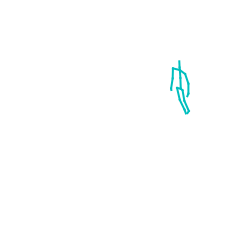

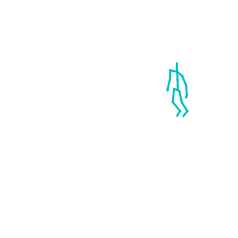

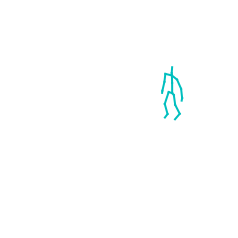

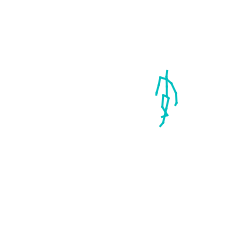

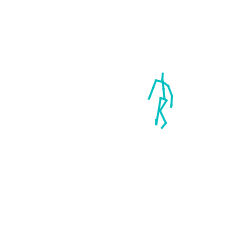

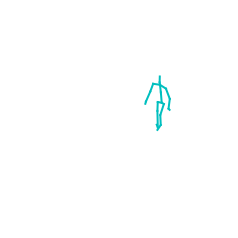

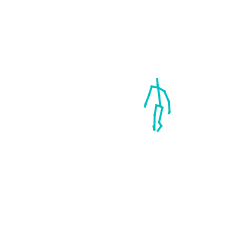

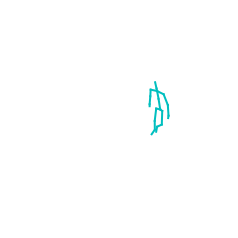

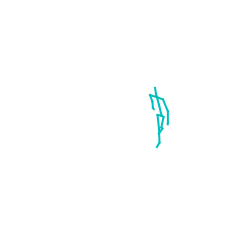

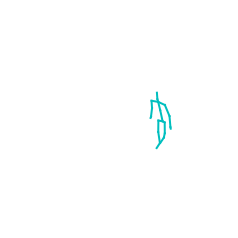

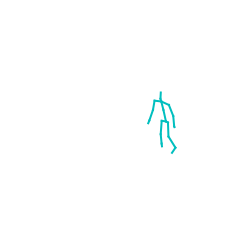

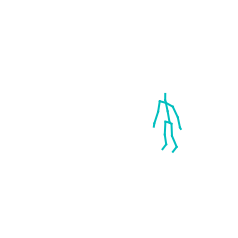

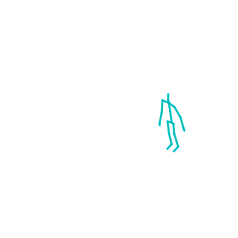

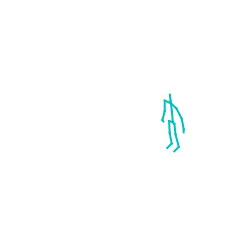

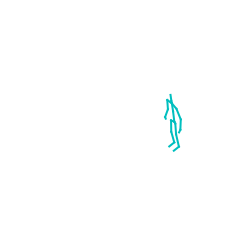

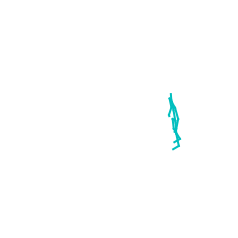

In [119]:
for i in range(0,len(p_0),4):
    show3Dpose(p_1[i],p_0[i])
    '''
    plt.axis('off')
    plt.imshow(p_0[i].T)
    plt.show()
    plt.axis('off')
    plt.imshow(p_1[i].T)
    plt.show()
    '''

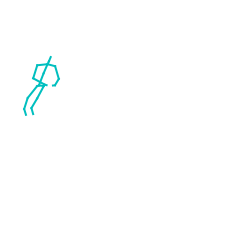

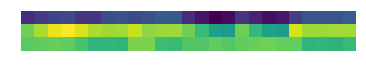

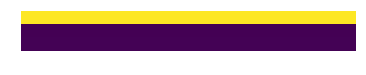

In [125]:
x_angle = 0
#y_angle = np.random.uniform(-np.pi/2,np.pi/2)
y_angle  = np.pi/6
z_angle = 0
R = euler2mat(x_angle, y_angle, z_angle, 'sxyz')
p_0, p_1 = rotaion_two(p_0, p_1, R)

p_0,p_1 = normlize_range(p_0,p_1)

for i in range(40,41):
    show3Dpose(p_1[i],p_0[i])
    plt.axis('off')
    plt.imshow(p_0[i].T)
    plt.show()
    plt.axis('off')
    plt.imshow(p_1[i].T)
    plt.show()

In [120]:
M_0,M_1,M_01,M_10 = get_distance_matrix(p_0,p_1,C)

In [104]:
M_0 = np.tril(M_0, k=0)
M_1 = np.tril(M_1, k=0)
M_01 = np.tril(M_01, k=0)
M_10 = np.tril(M_10, k=0)

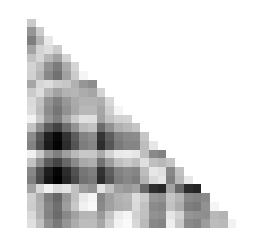

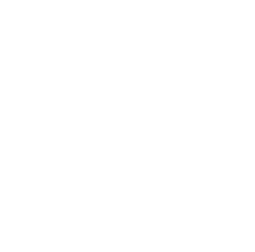

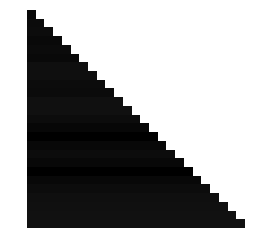

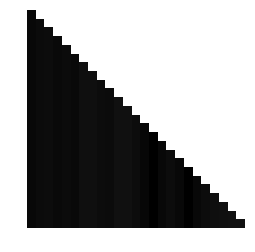

In [54]:
i=0
plt.axis('off')
plt.imshow(M_0[i],cmap=plt.get_cmap('binary'))
plt.show()
plt.axis('off')
plt.imshow(M_1[i],plt.get_cmap('binary'))
plt.show()
plt.axis('off')
plt.imshow(M_01[i],plt.get_cmap('binary'))
plt.show()
plt.axis('off')
plt.imshow(M_10[i],plt.get_cmap('binary'))
plt.show()

In [121]:
M_0.shape

(64, 325)

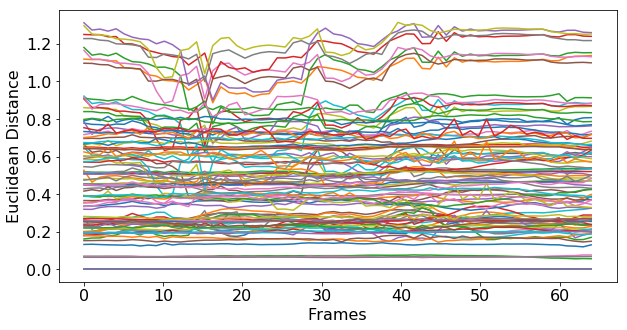

In [127]:
X = np.linspace(0,64,64, endpoint=True)
plt.figure(figsize=(10,5))
plt.xlabel('xlabel', fontsize=16)
plt.ylabel('ylabel', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
for i in range(M_0.shape[1])[:100]:
    plt.plot(X,np.squeeze(M_0[:,i]))

plt.xlabel('Frames')
plt.ylabel('Euclidean Distance')

plt.show()

In [41]:
from transforms3d.euler import euler2mat, mat2euler

def rotaion(p_0,p_1,R):
    p_0_new = np.zeros_like(p_0)
    p_1_new = np.zeros_like(p_1)
    for i,p in enumerate(p_0):
        p_0_new[i] = np.dot(R,p_0[i].T).T
    for i,p in enumerate(p_1):
        p_1_new[i] = np.dot(R,p_1[i].T).T
    return p_0_new,p_1_new


In [101]:
from scipy.spatial.distance import cdist
def get_distance_matrix(p_0,p_1,C):
    M_0 = []
    M_1 = []
    M_01 = []
    M_10 = []
    iu = np.triu_indices(C.joint_n,0,C.joint_n)
    
    for f in range(C.frame_l):
        #distance max 
        d_m_0 = cdist(p_0[f],p_0[f],'euclidean')
        d_m_1 = cdist(p_1[f],p_1[f],'euclidean')
        d_m_01 = cdist(p_0[f],p_1[f],'euclidean')
        d_m_10 = cdist(p_1[f],p_0[f],'euclidean')

        M_0.append(d_m_0[iu])
        M_1.append(d_m_1[iu])
        M_01.append(d_m_01[iu])
        M_10.append(d_m_10[iu])
 
    M_0 = np.stack(M_0)
    M_1 = np.stack(M_1)
    M_01 = np.stack(M_01)
    M_10 = np.stack(M_10)
    
    return M_0,M_1,M_01,M_10
